# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [355]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [356]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [357]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [358]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [359]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data.iloc[:, :-1]  # all columns except MEDV (target)
y = data.iloc[:, -1]   # MEDV (target column)

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [360]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lm = LinearRegression()

# Train the model on the training data
lm.fit(X_train, y_train)

# Generate predictions on the training set
y_train_pred = lm.predict(X_train)

# Generate predictions on the testing set
y_test_pred = lm.predict(X_test)

# Print the first 5 predictions from both the training and testing set
print(y_train_pred[:5])  # Corrected variable name
print(y_test_pred[:5])   # Corrected variable name


[30.4126056  23.82001324 19.32383117  6.4446593  11.76424239]
[21.91255819 18.30810393  7.50219553 30.56672721 32.91643787]


## 3. Calculate and print R-squared for both the training and the testing set.

In [361]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f"R-squared (R²) on Training Set: {r2_train}")
print(f"R-squared (R²) on Testing Set: {r2_test}")




R-squared (R²) on Training Set: 0.7361592384237121
R-squared (R²) on Testing Set: 0.7484031678924542


## 4. Calculate and print mean squared error for both the training and the testing set.

In [362]:
mean_squared_error(y_train_pred , y_train)
mean_squared_error(y_test_pred , y_test)

np.float64(20.55805163422987)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [363]:

mae_train = mean_absolute_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print(f"Mean Absolute Error (MAE) on Training Set: {mae_train}")
print(f"Mean Absolute Error (MAE) on Testing Set: {mae_test}")



Mean Absolute Error (MAE) on Training Set: 3.312818469260129
Mean Absolute Error (MAE) on Testing Set: 3.274078952173337


## Classification Model Evaluation

In [364]:
from sklearn.datasets import load_iris
data = load_iris()

In [365]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [366]:
column_names = data.feature_names

In [367]:
df = pd.DataFrame(data['data'],columns=column_names)

In [368]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [369]:
target = pd.DataFrame(data.target)

In [370]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [371]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [372]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [373]:
X= df.copy()
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [374]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)





LogisticRegression(multi_class='ovr')

In [375]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Print the first few predictions for verification
print("First few predictions on test set:", y_test_pred[:5])
print("First few predictions on train set:", y_train_pred[:5])

First few predictions on test set: [0 2 0 1 2]
First few predictions on train set: [0 1 2 0 2]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [376]:
from sklearn.metrics import accuracy_score


# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print(f"Accuracy on Training Set: {train_accuracy}")
print(f"Accuracy on Testing Set: {test_accuracy}")


Accuracy on Training Set: 0.9416666666666667
Accuracy on Testing Set: 0.9666666666666667


In [377]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculate the accuracy per class
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Print the accuracy for each class
for idx, accuracy in enumerate(class_accuracy):
    print(f"Accuracy for Class {idx}: {accuracy}")


Accuracy for Class 0: 1.0
Accuracy for Class 1: 0.8888888888888888
Accuracy for Class 2: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [378]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_train = balanced_accuracy_score(y_train, y_train_pred)

# Calculate balanced accuracy for the testing set
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)

# Print the balanced accuracy scores
print(f"Balanced Accuracy on Training Set: {balanced_accuracy_train}")
print(f"Balanced Accuracy on Testing Set: {balanced_accuracy_test}")


Balanced Accuracy on Training Set: 0.9430894308943089
Balanced Accuracy on Testing Set: 0.9629629629629629


## 10. Calculate and print the precision score for both the training and the testing set.

In [385]:
from sklearn.metrics import precision_score

# Calculate precision for the training set (average='weighted' handles the multiclass case)
precision_train = precision_score(y_train, y_train_pred, average='weighted')

# Calculate precision for the testing set (average='weighted' handles the multiclass case)
precision_test = precision_score(y_test, y_test_pred, average='weighted')

# Print the precision scores
print(f"Precision on Training Set: {precision_train}")
print(f"Precision on Testing Set: {precision_test}")


Precision on Training Set: 0.9431917862838916
Precision on Testing Set: 0.9700000000000001


## 11. Calculate and print the recall score for both the training and the testing set.

In [386]:
from sklearn.metrics import recall_score

# Calculate recall for the training set (average='weighted' handles the multiclass case)
recall_train = recall_score(y_train, y_train_pred, average='weighted')

# Calculate recall for the testing set (average='weighted' handles the multiclass case)
recall_test = recall_score(y_test, y_test_pred, average='weighted')

# Print the recall scores
print(f"Recall on Training Set: {recall_train}")
print(f"Recall on Testing Set: {recall_test}")


Recall on Training Set: 0.9416666666666667
Recall on Testing Set: 0.9666666666666667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [387]:
from sklearn.metrics import f1_score

# Calculate F1 score for the training set (average='weighted' handles the multiclass case)
f1_train = f1_score(y_train, y_train_pred, average='weighted')

# Calculate F1 score for the testing set (average='weighted' handles the multiclass case)
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print the F1 scores
print(f"F1 Score on Training Set: {f1_train}")
print(f"F1 Score on Testing Set: {f1_test}")


F1 Score on Training Set: 0.9415884834946637
F1 Score on Testing Set: 0.9665634674922601


## 13. Generate confusion matrices for both the training and the testing set.

Confusion Matrix for Training Set:


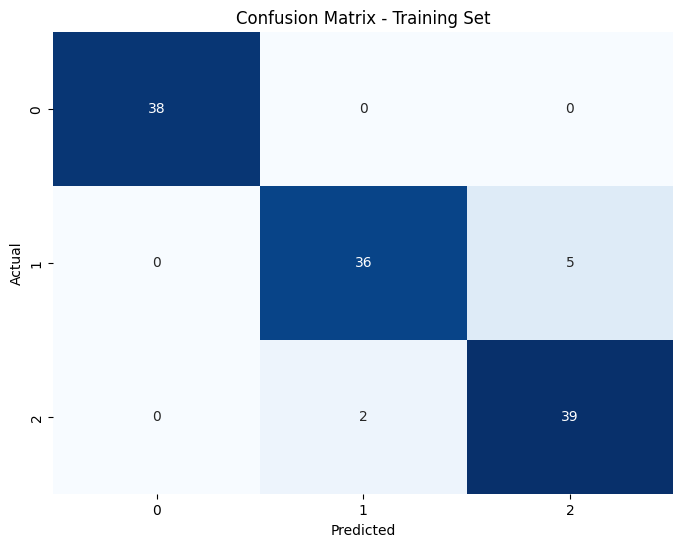

Confusion Matrix for Testing Set:


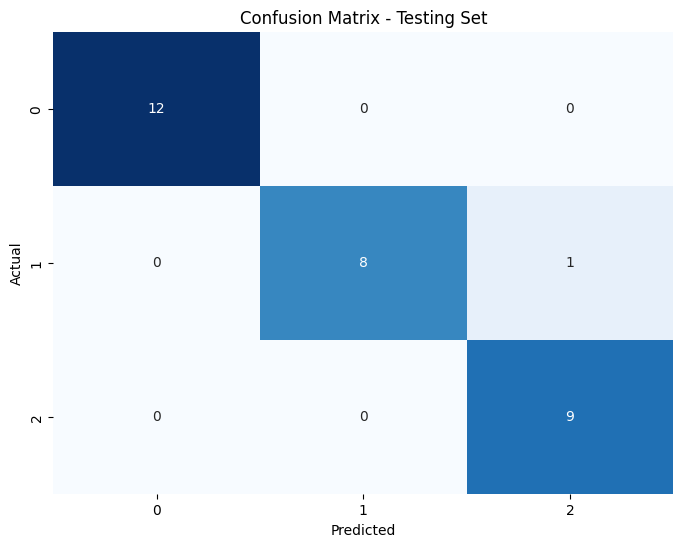

In [388]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Generate the confusion matrix for the testing set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrices
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrices
print("Confusion Matrix for Training Set:")
plot_confusion_matrix(conf_matrix_train, "Confusion Matrix - Training Set")

print("Confusion Matrix for Testing Set:")
plot_confusion_matrix(conf_matrix_test, "Confusion Matrix - Testing Set")


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [383]:
# Have fun here !